# Fraud detection

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score,f1_score,precision_score
#Visualization
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import auc
from sklearn import metrics


In [3]:
df = pd.read_excel('brazilian credit card.xlsx')
df.info()
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374823 entries, 0 to 374822
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   mcc_cat numeric              374823 non-null  int64
 1   mcc_ant_cat numeric          374823 non-null  int64
 2   cep_cat numeric              374823 non-null  int64
 3   cep_ant_cat numeric          374823 non-null  int64
 4   valor_trans_cat numeric      374823 non-null  int64
 5   valor_trans_ant_cat numeric  374823 non-null  int64
 6   pos_entry numeric            374823 non-null  int64
 7   lim_cred_cat numeric         374823 non-null  int64
 8   bandeira_cat numeric         374823 non-null  int64
 9   variante_cat numeric         374823 non-null  int64
 10  score_cat numeric            374823 non-null  int64
 11  tp_pessoa_cat numeric        374823 non-null  int64
 12  trans_nacional_cat numeric   374823 non-null  int64
 13  qtde_parc_cat numeric        

,mcc_cat numeric,mcc_ant_cat numeric,cep_cat numeric,cep_ant_cat numeric,valor_trans_cat numeric,valor_trans_ant_cat numeric,pos_entry numeric,lim_cred_cat numeric,bandeira_cat numeric,variante_cat numeric,score_cat numeric,tp_pessoa_cat numeric,trans_nacional_cat numeric,qtde_parc_cat numeric,velocidade_cat numeric,dif_score_cat numeric,trans_limit_cat numeric,Class
0,9,22,3,3,6,6,2,6,2,3,0,1,0,1,7,1,0,0
1,22,22,3,3,7,7,2,6,2,3,0,1,0,1,4,4,0,0
2,22,22,3,3,7,7,2,6,2,3,3,1,0,1,6,5,0,1
3,9,0,2,0,4,1,2,4,2,3,0,1,0,1,2,3,0,0
4,15,9,2,2,4,4,2,4,2,3,0,1,0,1,3,3,0,0


In [4]:
df.describe()

,mcc_cat numeric,mcc_ant_cat numeric,cep_cat numeric,cep_ant_cat numeric,valor_trans_cat numeric,valor_trans_ant_cat numeric,pos_entry numeric,lim_cred_cat numeric,bandeira_cat numeric,variante_cat numeric,score_cat numeric,tp_pessoa_cat numeric,trans_nacional_cat numeric,qtde_parc_cat numeric,velocidade_cat numeric,dif_score_cat numeric,trans_limit_cat numeric,Class
count,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000
mean,10.903594,6.631066,3.903498,2.287608,4.992148,3.362643,3.834394,5.897376,2.348597,2.015295,0.627632,0.983144,0.004898,1.210195,3.365092,2.933561,0.069945,0.037434
std,6.264215,7.300236,2.441054,2.648531,2.434372,2.712998,3.159801,2.430863,1.717701,0.835288,1.699094,0.128732,0.069816,0.466723,1.706867,0.984662,0.399692,0.189822
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000
50%,9.000000,6.000000,4.000000,1.000000,5.000000,2.000000,2.000000,6.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000
75%,15.000000,12.000000,6.000000,4.000000,7.000000,5.000000,9.000000,8.000000,5.000000,3.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,0.000000
max,32.000000,32.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,5.000000,9.000000,1.000000,1.000000,3.000000,7.000000,5.000000,9.000000,1.000000


In [5]:
df.shape

(374823, 18)

In [6]:
selected_vars =['cep_cat numeric',
 'score_cat numeric',
 'velocidade_cat numeric',
 'bandeira_cat numeric',
 'qtde_parc_cat numeric',
 'valor_trans_cat numeric',
 'trans_nacional_cat numeric',
 'mcc_cat numeric',
 'valor_trans_ant_cat numeric',
 'mcc_ant_cat numeric',
 'dif_score_cat numeric',
 'cep_ant_cat numeric',
 'lim_cred_cat numeric']

In [7]:
df1=df[selected_vars]
Target=df['Class']
df.drop('Class',axis=1, inplace=True)

In [8]:
df1.head()

,cep_cat numeric,score_cat numeric,velocidade_cat numeric,bandeira_cat numeric,qtde_parc_cat numeric,valor_trans_cat numeric,trans_nacional_cat numeric,mcc_cat numeric,valor_trans_ant_cat numeric,mcc_ant_cat numeric,dif_score_cat numeric,cep_ant_cat numeric,lim_cred_cat numeric
0,3,0,7,2,1,6,0,9,6,22,1,3,6
1,3,0,4,2,1,7,0,22,7,22,4,3,6
2,3,3,6,2,1,7,0,22,7,22,5,3,6
3,2,0,2,2,1,4,0,9,1,0,3,0,4
4,2,0,3,2,1,4,0,15,4,9,3,2,4


Final Dataframe

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374823 entries, 0 to 374822
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   cep_cat numeric              374823 non-null  int64
 1   score_cat numeric            374823 non-null  int64
 2   velocidade_cat numeric       374823 non-null  int64
 3   bandeira_cat numeric         374823 non-null  int64
 4   qtde_parc_cat numeric        374823 non-null  int64
 5   valor_trans_cat numeric      374823 non-null  int64
 6   trans_nacional_cat numeric   374823 non-null  int64
 7   mcc_cat numeric              374823 non-null  int64
 8   valor_trans_ant_cat numeric  374823 non-null  int64
 9   mcc_ant_cat numeric          374823 non-null  int64
 10  dif_score_cat numeric        374823 non-null  int64
 11  cep_ant_cat numeric          374823 non-null  int64
 12  lim_cred_cat numeric         374823 non-null  int64
dtypes: int64(13)
memory usage: 37

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scoring = ['accuracy','precision','recall','f1']
clf = LGBMClassifier(colsample_bytree=0.7, is_unbalance=False, learning_rate=0.01,num_iterations=500,
               max_bin=100, max_depth=16, metric='f1', min_child_samples=100,
               min_child_weight=0,n_estimators=5000,
               num_leaves=1000, random_state=0,
                subsample_freq=0);
scores = cross_validate(clf, df, Target,cv=cv ,scoring=scoring)
print("fit_time: ",scores['fit_time'].mean(),"test_accuracy",scores['test_accuracy'].mean(),"test_precision",scores['test_precision'].mean(),"test_recall",scores['test_recall'].mean(),"test_f1",scores['test_f1'].mean())

fit_time:  98.66403255462646 test_accuracy 0.9994842014460146 test_precision 0.9984546429204816 test_recall 0.9877284895521348 test_f1 0.9930617339123234


In [11]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scoring = ['accuracy','precision','recall','f1']
clf = LGBMClassifier(colsample_bytree=0.7, is_unbalance=False, learning_rate=0.01,num_iterations=600,
               max_bin=100, max_depth=16, metric='f1', min_child_samples=100,
               min_child_weight=0,n_estimators=5000,
               num_leaves=1000, random_state=0,
                subsample_freq=0);
scores = cross_validate(clf, df[selected_vars], Target,cv=cv ,scoring=scoring)
print("fit_time: ",scores['fit_time'].mean(),"test_accuracy",scores['test_accuracy'].mean(),"test_precision",scores['test_precision'].mean(),"test_recall",scores['test_recall'].mean(),"test_f1",scores['test_f1'].mean())

fit_time:  80.23025784492492 test_accuracy 0.9993419121897427 test_precision 0.9978733215573132 test_recall 0.9844827841321777 test_f1 0.9911280789922359


# outlier

## OneClassSVM

In [12]:
from sklearn.svm import OneClassSVM

In [13]:
df1_fraud=df1[Target==1]
df1_normal=df1[Target==0]
df1_fraud.shape,df1_normal.shape

((14031, 13), (360792, 13))

In [14]:
clf = OneClassSVM()
res = clf.fit_predict(df1_fraud)
np.unique(res)

array([-1,  1], dtype=int64)

In [15]:
df1_normal['Class']=0
df1_fraud['Class']=res

In [16]:
frames = [df1_normal, df1_fraud]
result = pd.concat(frames)

In [17]:
osvm_res=result[result['Class']!=-1]
osvm_out=result[result['Class']==-1]
result[result['Class']==-1].shape

(7038, 14)

In [18]:
osvm_t=pd.DataFrame(osvm_res['Class'])
osvm_res.drop(['Class'],axis=1,inplace=True)
osvm_ot=pd.DataFrame(osvm_out['Class'])
osvm_out.drop(['Class'],axis=1,inplace=True)

# Balancing

In [19]:
from imblearn.over_sampling import SMOTE 

Mean ACC:  0.9996383756814443  Mean precision:  0.9851015331097077  Mean Recall:  0.9959508990281637  Mean F1:  0.9904888733418384  Mean AUC:  0.9978299452117914


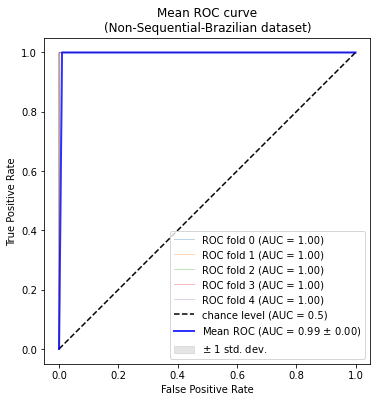

In [21]:
from sklearn.metrics import accuracy_score
from statistics import mean
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

kf = KFold(n_splits=5, shuffle = True,random_state=0)
X=osvm_res.copy()
X.reset_index(drop=True,inplace=True)
y=osvm_t.copy()
y.reset_index(drop=True,inplace=True)
f1=[]
acc=[]
recall=[]
precision=[]
AUC=[]
prs = []
aucs = []
k=0
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(6, 6))
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    ros = SMOTE(random_state=0,sampling_strategy=0.0526315789)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    clf = LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01,num_iterations=400,
               max_bin=100, max_depth=16, metric='f1', min_child_samples=100,
               min_child_weight=0,num_leaves=1000, random_state=0,subsample_freq=0);
    clf.fit(X_resampled,y_resampled)
    preds = clf.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
    AUC.append(metrics.auc(fpr, tpr))
    f1.append(f1_score(y_test, preds))
    acc.append(accuracy_score(y_test, preds))
    recall.append(recall_score(y_test,preds))
    precision.append(precision_score(y_test, preds))
    viz = RocCurveDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        name=f"ROC fold {k}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    k+=1
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
print("Mean ACC: ",mean(acc)," Mean precision: ",mean(precision)," Mean Recall: ",mean(recall)," Mean F1: ",mean(f1)," Mean AUC: ",mean(AUC))
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve\n(Non-Sequential-Brazilian dataset)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()